# Model Evaluation

Understanding how well your model performs is crucial for any machine learning project. In this notebook, we'll explore various evaluation metrics and validation techniques using practical examples from previous projects.

Model evaluation methods differ based on the machine learning model we're using.

**Supervised Learning** is generally split into *classification* and *regression*. Here's an overview of some of the model evaluation methods we can use in supervised learning:

1. Classification:

  - Accuracy-based metrics:

      - Accuracy: Simple but can be misleading with imbalanced data
      
      - Precision: Measures false positive rate
      
      - Recall: Measures false negative rate
      
      - F1-Score: Harmonic mean of precision and recall

  - Combination Analysis:

      - Confusion matrix: Gives true positives, false positives, true negatives and false negatives.

      - Classification reports: Shows the main metrics for each class of a machine learning model. It usually includes the precision, recall, F1-score, and support for each class, as well as the weighted average of these metrics across all classes.

2. Regression:

  - Error-based metrics:

      - Mean Squared Error (MSE): Penalizes larger errors more heavily

      - Root Mean Squared Error (RMSE): In same units as target variable

      - Mean Absolute Error (MAE): Less sensitive to outliers
      
      - R-squared (R²): Proportion of variance explained by model

3. Either Classification or Regression:

    - Cross-Validation: Resampling method to evaluated ML models on limited data sample.

For **Unsupervised Learning** evaluation is more challenging because we don't have *ground truth* labels. We can't define concepts like overfitting or underfitting in unsupervised learning because there is no objective criteria to say that some output is "correct". Further, there is no "correct" clustering solution, as there are no labels. (There is, however, a situation analagous to overfitting in which we have <n> clusters and <n> data points, which renders a clustering useless.)

So, how can we judge the performance of a clustering model? Well, we can look at how different clusters are, how different the data points within a cluster are, and how spread out clusters are.

In this notebook, we're going to take a look at our cluster analysis project and compute following metrics:

- Silhouette score: Measures cluster cohesion and separation

- Calinski-Harabasz index: Ratio of between-cluster to within-cluster variance

- Davies-Bouldin index: Average similarity of clusters

- Inertia: Sum of distances to nearest cluster center

Overall, the key is to choose evaluation methods that match your problem type, account for data characterstics, and provide actionable insights for improvement.

✍🏼 In order to edit this notebook, make a copy and save it in your Google Drive.




## Set Up

We'll be evaluating the the models used in the following notebooks:

1. [Decision Trees for Classification](https://colab.research.google.com/drive/1eHlt1weznhJ8J79nrtu3sEK35ntoZf9q?usp=sharing)
2. [Linear Regression](https://colab.research.google.com/drive/1VPXBEe6YztKHLGPrxBPBIKo6cC6NpAjR)
3. [Cluster Analysis](https://colab.research.google.com/drive/19DnsAoJNCmVN1Z0vPomTVABcZZ7U1WPi)

💾 Here are the datasets we used for each:

1. [Lung Cancer Dataset](https://drive.google.com/file/d/1JNc70HaJCsbbzvVLJh8ehO8R4kCg7BCG/view?usp=drive_link)
2. [Insurance Cost Dataset](https://drive.google.com/file/d/16j7c5V-IPJnZM6smdwrM0vMpHWyHaElJ/view?usp=drive_link)
3. [Cluster Analysis of Tumors](https://drive.google.com/file/d/1NgW1TywCYZbcl_vIP61xBUoe9krbAB-g/view?usp=drive_link)

To get started, download the datasets and make sure they're accessible in this Colab notebook.


Now, let's import our usual libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Evaluating Classification Models

Recall from our Decision Tree reading that we can use the `DecisionTreeClassifier` from `sklearn.tree` to classify data. In this case, we were hoping to predict instances of lung cancer given information about the patient.

The following code block creates our Decision Tree Classification model and prints a list of predictions corresponding to our test features.

In [ ]:
# Decision Trees for Classification Model

from sklearn.tree import DecisionTreeClassifier

# Read dataset into DataFrame
lung_df = pd.read_csv('DecisionTrees-lung.csv')
lung_df.head()

# Preprocessing

lung_df.drop_duplicates() # Drop Duplicates
lung_df.dropna(inplace=True)  # Drop Missing Values

le = LabelEncoder() # Encoding Categorical Variables
lung_df['GENDER']=le.fit_transform(lung_df['GENDER'])
lung_df['LUNG_CANCER']=le.fit_transform(lung_df['LUNG_CANCER'])
lung_df['SMOKING']=le.fit_transform(lung_df['SMOKING'])
lung_df['YELLOW_FINGERS']=le.fit_transform(lung_df['YELLOW_FINGERS'])
lung_df['ANXIETY']=le.fit_transform(lung_df['ANXIETY'])
lung_df['PEER_PRESSURE']=le.fit_transform(lung_df['PEER_PRESSURE'])
lung_df['CHRONIC DISEASE']=le.fit_transform(lung_df['CHRONIC DISEASE'])
lung_df['FATIGUE ']=le.fit_transform(lung_df['FATIGUE '])
lung_df['ALLERGY ']=le.fit_transform(lung_df['ALLERGY '])
lung_df['WHEEZING']=le.fit_transform(lung_df['WHEEZING'])
lung_df['ALCOHOL CONSUMING']=le.fit_transform(lung_df['ALCOHOL CONSUMING'])
lung_df['COUGHING']=le.fit_transform(lung_df['COUGHING'])
lung_df['SHORTNESS OF BREATH']=le.fit_transform(lung_df['SHORTNESS OF BREATH'])
lung_df['SWALLOWING DIFFICULTY']=le.fit_transform(lung_df['SWALLOWING DIFFICULTY'])
lung_df['CHEST PAIN']=le.fit_transform(lung_df['CHEST PAIN'])
lung_df['LUNG_CANCER']=le.fit_transform(lung_df['LUNG_CANCER'])

# Splitting data into independent variables (features) and dependent variables (target)
X = lung_df.drop('LUNG_CANCER', axis = 1)
y = lung_df['LUNG_CANCER']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Instantiate Model - Class Weight Balanced

dt_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the Model
dt_balanced.fit(X_train, y_train)

# Make Predictions
y_dt_balanced_pred = dt_balanced.predict(X_test)

print(y_dt_balanced_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1]


### Accuracy

Accuracy is often the first metric people reach for when evaluating a classification model. While it seems straightforward - the percentage of correct predictions - accuracy can be misleading, especially with imbalanced datasets like medical diagnoses. Consider a dataset where only 5% of patients have lung cancer. A model that simply predicts "no cancer" for everyone would achieve 95% accuracy, yet it would be completely useless for identifying cancer cases.

This is why we need to consider the baseline accuracy - the accuracy we'd get by always predicting the majority class. Any useful model should perform significantly better than this baseline. For instance, if 80% of our cases are non-cancer, our baseline accuracy would be 0.80. A model accuracy of 0.82 might seem good at first glance, but it's only marginally better than simply guessing "no cancer" every time.

Furthermore, accuracy treats all mistakes equally. In medical diagnosis, missing a cancer case (false negative) is generally much more serious than incorrectly flagging a healthy patient for additional testing (false positive). To truly understand model performance, we need to look at other metrics like precision and recall, which we'll explore through the confusion matrix and classification report.

The imbalanced nature of medical data also explains why we used class_weight='balanced' in our DecisionTreeClassifier. This helps the model pay more attention to the minority class (cancer cases) during training, potentially sacrificing some overall accuracy to better identify positive cases. Our goal isn't just high accuracy - it's building a model that's actually useful for medical screening.

✅ **Try it yourself**: Compute the accuracy of our model and compare it to the baseline accuracy.

In [ ]:
# Your Code Here

In [ ]:
from sklearn.metrics import accuracy_score
from collections import Counter

# See distribution of our classes
class_distribution = Counter(y)
print("\nClass Distribution:")
print(f"Cancer cases: {class_distribution[1]}")
print(f"Non-cancer cases: {class_distribution[0]}")

# Calculate baseline accuracy (accuracy if we always predicted the majority class)
baseline_accuracy = max(class_distribution.values()) / sum(class_distribution.values())
print(f"\nBaseline accuracy (always predicting majority class): {baseline_accuracy:.3f}")

# Calculate our model's accuracy
model_accuracy = accuracy_score(y_test, y_dt_balanced_pred)
print(f"Our model's accuracy: {model_accuracy:.3f}")


Class Distribution:
Cancer cases: 270
Non-cancer cases: 39

Baseline accuracy (always predicting majority class): 0.874
Our model's accuracy: 0.974


🤔 **Concept Check**: Model Performance Analysis

Our lung cancer prediction model achieved 97.4% accuracy, while the baseline accuracy (always predicting no cancer) was 87.4%. A junior data scientist could be impressed by the 97.4% accuracy and want to deploy the model immediately. What important questions should be asked before accepting this model as "good"? What might be concerning about these numbers?

Answer: While the model's accuracy of 97.4% is higher than the baseline of 87.4%, this situation raises several red flags. First, the very high baseline accuracy (87.4%) indicates a highly imbalanced dataset where most cases (87.4%) are one class (likely non-cancer). In medical diagnosis, this is common but requires careful analysis.

The model's improvement over baseline is about 10 percentage points. While this is better than baseline, in a medical context where missing cancer cases can be fatal, we absolutely need to look at recall (what percentage of actual cancer cases we caught) and precision (of our cancer predictions, how many were correct). It's possible to have high accuracy but poor performance on the minority class (cancer cases).

A more complete analysis would require asking:

1. Of the 12.6% of cases that are cancer (100% - 87.4%), how many did we correctly identify?
2. What is the cost of false negatives (missed cancer cases) in this context?

In medical diagnosis, a model could have lower overall accuracy but be more useful if it catches more cancer cases, even at the cost of more false positives.

### Confusion Matrix

Next, we'll create and visualize the confusion matrix to understand prediction errors.

❓ **Question**: What are the four possible outcomes in a confusion matrix for our lung cancer prediction?

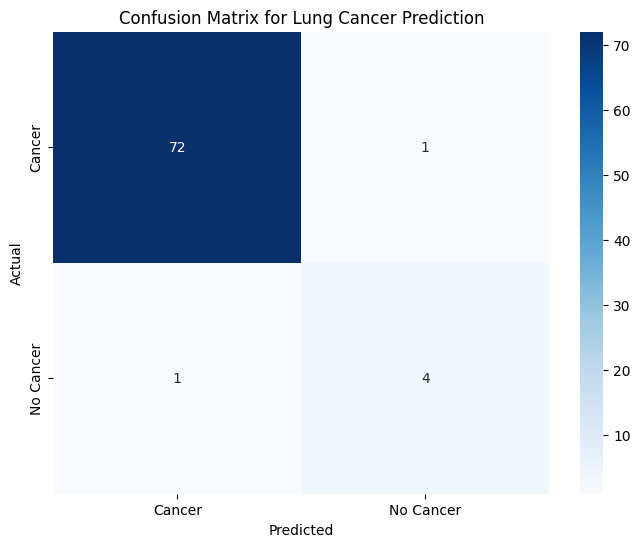


Confusion Matrix Interpretation:
True Positives (correctly predicted cancer): 72
False Negatives (incorrectly predicted no cancer): 1
False Positives (incorrectly predicted cancer): 1
True Negatives (correctly predicted no cancer): 4


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):

    # Create confusion matrix
    labels = ['Cancer', 'No Cancer']
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])  # Explicitly specify labels

    # Create heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Cancer', 'No Cancer'],
                yticklabels=['Cancer', 'No Cancer'])
    plt.title('Confusion Matrix for Lung Cancer Prediction')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print interpretation
    print("\nConfusion Matrix Interpretation:")
    print(f"True Positives (correctly predicted cancer): {cm[0,0]}")
    print(f"False Negatives (incorrectly predicted no cancer): {cm[0,1]}")
    print(f"False Positives (incorrectly predicted cancer): {cm[1,0]}")
    print(f"True Negatives (correctly predicted no cancer): {cm[1,1]}")

plot_confusion_matrix(y_test, y_dt_balanced_pred)

❓ **Question**: Why should we care about false positives vs. false negatives in the context of medical diagnosis? Would a false positive or a false negative be worse in this situation?

### Classification Report

As we can see with the Confusion Matrix, when evaluating our model's predictions, there are four ways to check if the predictions are right or wrong:

1. TN / True Negative: the case was negative and predicted negative
2. TP / True Positive: the case was positive and predicted positive
3. FN / False Negative: the case was positive but predicted negative
4. FP / False Positive: the case was negative but predicted positive

The `classification_report` function from `sklearn.metrics` returns a text summary of the precision, recall, and F1 score for each class. Let's talk about these in more detail:

1. **Precision**: *What percent of your predictions were correct?*

  Precision is the ability of a classifier not to label an instance positive that is actually negative. The score ranges from 0 to 1, and the closer to 1, the better.

  Precision = TP/(TP + FP)

2. **Recall**: *What percent of positive cases did the model catch?*

  Recall is the ability of a classifier to find all positive instances. The score ranges from 0 to 1, and the closer to 1, the better. Generally, precision needs to be at least 50% for a model to be useful. Recall is less useful in imbalanced datasets, where the number of actual positives is very low.
  
  Precision improves as false positives decrease, while recall improves when false negatives decrease. As a result, precision and recall often (but not always) show an inverse relationship, where improving one of them worsens the other.

  More precision involves a harsher critic (classifier) that doubts even the actual positive samples from the dataset, thus reducing the recall score. On the other hand, more recall entails a lax critic that allows any sample that resembles a positive class to pass, which makes border-case negative samples classified as “positive,” thus reducing the precision. Ideally, we want to maximize both precision and recall metrics to obtain the perfect classifier.
  
  


  Recall = TP/(TP+FN)

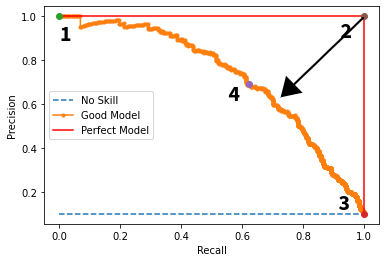

3. **F1 Score**: *How well is a model balancing both precision and recall in its predictions?*

  The F1 Score is a weighted harmonic mean of precision and recall. The closer to 1, the better the model. If the F1 score is below 0.5, the model is considered to have poor performance.

  F1 Score = 2*(Recall * Precision) / (Recall + Precision)

4. **Support**: *How many data points were in each class?*

  Support is the number of actual occurrences of the class in the specified dataset, which will usually be your test set. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for a different sampling method. Support doesn't change between models but instead provides insight into the evaluation process.

5. **Macro-Average**: *What's the average of precision, recall, and F1 across all classes*?

  This method treats all classes equally.

6. **Weighted Average**: *What's the average of precision, recall, and F1 across all classes, accounting for potentially class imbalance?*

  The Weighted Average considers the number of actual occurrences of the class in the dataset. The 'weight' refers to the proportion of each class' count relative to the sum of all class counts.

❓ **Question**: For this model, would you rather have high recall or high precision?

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("\nDetailed Classification Metrics:")
print(classification_report(y_test, y_dt_balanced_pred))



Detailed Classification Metrics:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.99      0.99      0.99        73

    accuracy                           0.97        78
   macro avg       0.89      0.89      0.89        78
weighted avg       0.97      0.97      0.97        78



#### Understanding Our Classification Metrics

In medical diagnosis scenarios like our lung cancer prediction model, having high recall (sensitivity) is often prioritized over precision. This means we'd rather have more false positives than miss actual cancer cases. For example, if our model has high recall but lower precision, it might flag more patients for additional testing who don't actually have cancer, but it would catch most of the real cancer cases. The cost of missing a cancer diagnosis (false negative) could be fatal, while the cost of a false positive is typically just additional testing.

Conversely, in spam email detection, we might prioritize precision over recall. We want to be very confident that when we mark something as spam, it truly is spam (high precision), even if this means we let some spam through to the inbox (lower recall). The cost of mistakenly marking a legitimate email as spam (false positive) could mean missing crucial communications, while occasionally seeing spam in your inbox is merely annoying.

Another example where precision might be prioritized is in automated trading systems. When automatically executing trades, we want to be very confident in our predictions of profitable opportunities (high precision), as each false positive could result in financial losses. Missing some profitable trades (false negatives) is less costly than making poor trades.

In content moderation for social media, the balance often depends on the specific type of content being moderated. For hate speech or explicit content, high recall might be preferred to ensure a safe platform, even if some benign content is flagged for review. However, for automatic content removal without human review, high precision would be crucial to avoid incorrectly censoring legitimate posts.

The key is understanding the relative costs of false positives versus false negatives in your specific context. When false negatives are very costly (like missing cancer or crime), optimize for recall. When false positives are very costly (like blocking legitimate financial transactions or important emails), optimize for precision.

In the context of our Decision Tree Classification model, the model is good at its most important task--identifying cancer cases--while maintaining reasonable performance on non-cancer cases. However, to ensure it's generalization ability, we may want to employ **Cross-Validation**.

### Cross-Validation

Cross-validation is a resampling procedure used to evaluate ML models on a limited data sample.

If you have a machine learning model and some data, you want to tell if your model can fit. You can split your data into training and test set. Train your model with the training set and evaluate the result with test set. But you evaluated the model only once and you are not sure your good result is by luck or not. You want to evaluate the model multiple times so you can be more confident about the model design.

In **k-Fold Cross-Validation**, we have a single parameter `k` that refers to the number of groups that a given data sample is to be split into. The original sample is randomly partitioned into `k` equal sized subsamples, which are our "folds". Of the `k` subsamples, a single subsample is retained as the validation data for testing, and the remaining `k - 1` subsamples are used as training data. The cross-validation process is then repeated `k` times, with each of the `k` subsamples used exactly once as the validation data. The `k` results can then be average to produce a signle estimation. When a specific value for `k` is chosen, it may be used in place of k in the reference to the model, such as `k=5` becoming 5-fold cross-validation:

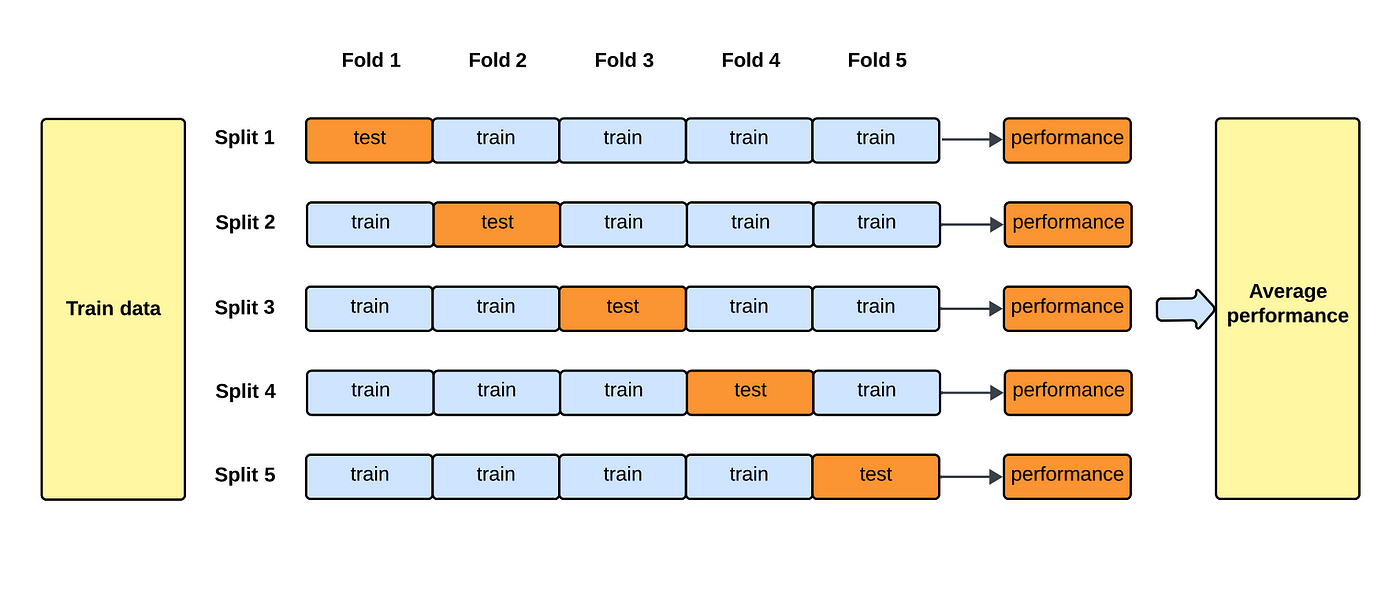

This lung cancer diagnosis project is a good candidate for cross-validation as we have a small dataset and we need to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

Let's see how we can apply cross-validation to this model:


Cross-Validation Results:
Individual fold scores: [0.96774194 0.87096774 0.91935484 0.85483871 0.90163934]
Average CV Score: 0.903 (+/- 0.079)


<ipython-input-9-5e7b75a4fb3e>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_results[metric] for metric in metrics], labels=metrics)


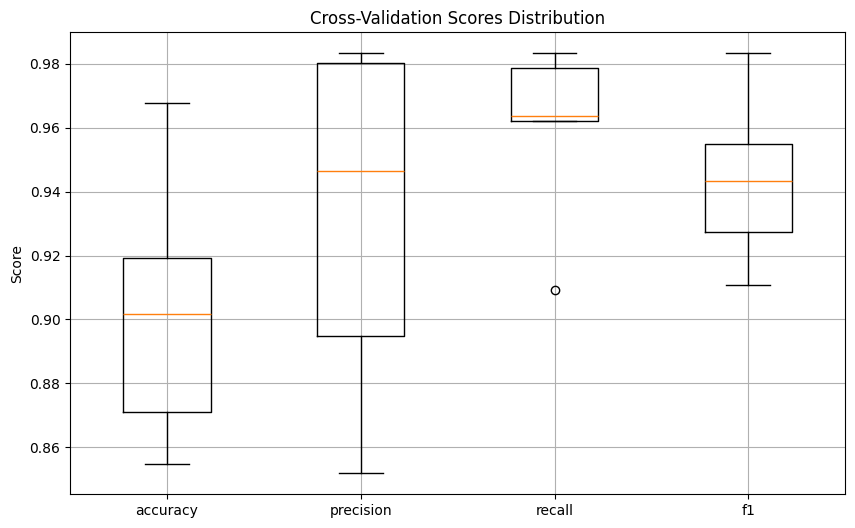

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
dt_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)
cv_scores = cross_val_score(dt_balanced, X, y, cv=kf, scoring='accuracy')

print("\nCross-Validation Results:")
print(f"Individual fold scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")

# Evaluating multiple metrics via cross-validation
metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = {}

for metric in metrics:
    scores = cross_val_score(dt_balanced, X, y, cv=kf, scoring=metric)
    cv_results[metric] = scores

# Visualization of cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot([cv_results[metric] for metric in metrics], labels=metrics)
plt.title('Cross-Validation Scores Distribution')
plt.ylabel('Score')
plt.grid(True)
plt.show()

❓ **Question**: Looking at all of our evaluation metrics after cross-validation, what are the strengths and weaknesses of our model?

## Evaluating Regression Models

We've already discussed most of the regression evaluation methods in our Supervised Learning module, but let's review:

- Mean Squared Error (MSE): The average of the squared differences between predictions and actual values. Larger errors are penalized more due to squaring. Units are squared (e.g. if predicting dollars, MSE is dollars squared.

- Root Mean Squared Error (RMSE): The square root of MSE, bringing the metric back to the original scale of the target variable.

- Mean Absolute Error (MAE): MAE is the average of the absolute differences between predictions and actual values. Less sensitive to outliers than MSE/RMSE. Easier to interpret as average error magnitude.

- R-squared (R²): Proportion of variance in the dependent variable explained by the independent variables. Usually ranges from 0 to 1 (can be negative for very poor models). Closer to 1 indicates better fit. Independent of scale.

❓ **Question**: Why do we need multiple metrics to evaluate regression models? Why not just use one?

❕**Answer**: Different metrics capture different aspects of model performance. For example:
- Some metrics are more sensitive to outliers
- Some are easier to interpret in certain contexts
- Some are better for comparing models across different scales
- Using multiple metrics gives us a more complete picture of model performance

In order to see some of these metrics in use, let's revisit the challenge problem from our Linear Regression notebook.

With the goal of predicting insurance charges given features like age, gender, and so forth, we explored the concept of **Multiple Linear Regression**. Let's create and train that model and take a look at the coefficients corresponding to each feature.

In [ ]:
# Set Up

from sklearn.linear_model import LinearRegression

insurance_df = pd.read_csv('LinearRegression-insurance.csv')

insurance_df_encoded = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)

# MULTIPLE LINEAR REGRESSION
print("\nMultiple Linear Regression:")

# Define Features and Target
X = insurance_df_encoded.drop('charges', axis=1)
y = insurance_df_encoded['charges']

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


Multiple Linear Regression:
Model Coefficients:
age: 256.98
bmi: 337.09
children: 425.28
sex_male: -18.59
smoker_yes: 23651.13
region_northwest: -370.68
region_southeast: -657.86
region_southwest: -809.80


❓ **Question**: Based on the coefficients, does it appear that age is positively or negatively correlated with insurance charges? What about gender--based on these coefficients, are men or women more likely to have higher insurance charges?

Now, let's see how our model performed.

✅ **Try it yourself**: Calculate the MSE, RMSE, MAE, and R-Squared for our regression model using the functions from `sklearn.metrics`.

Note that the `mean_squared_error` function from `sklearn.metrics` has a parameter that allows it to return the RMSE instead, but this is only available in the most recent update of `sklearn.metrics`. Can we think of a way to find the RMSE from the MSE without using another `sklearn` function?

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# Your Code Here

In [ ]:
# Solution - LW

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:,.2f} $ squared")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"R²: {r2:.3f}")

MSE: 33,596,915.85 in $ squared
RMSE: $5,796.28
MAE: $4,181.19
R²: 0.784


❓ **Question**: Why is the MAE lower than the RMSE in this case?

**❕Answer**: The MAE is lower than the RMSE because RMSE squares errors before averaging, which gives more weight to larger errors. The difference between these values  suggests that our model makes some large prediction errors (outliers) that are penalized more heavily in the RMSE calculation. This indicates our model might struggle with certain unusual cases or extreme values.

❓ **Question**:

If you had to choose just one of these metrics to evaluate this insurance cost prediction model, which would you choose and why?

**❕Answer**:  For an insurance prediction model, RMSE ($5,796.28) would be the most suitable single metric because:

It's in the same units as the predictions (dollars)
It penalizes large errors, which is important in insurance where large mistakes can be costly
It's more conservative than MAE, providing a "worst-case" view that's valuable in risk assessment
It's easily interpretable for both technical and non-technical stakeholders

### Cross-Validation for Regression Models

We've already seen how cross-validation can help us evaluate classification models, but we can also use cross-validation to evaluate regression models. When we split our data into just training and testing sets (as we did in our previous insurance charges analysis), we might:

- Get lucky or unlucky with our split
- Miss important patterns in our data
- Not fully utilize our available data
- Get an unreliable estimate of model performance

✅ **Try it yourself**: Perform 5-fold cross-validation of our Multiple Linear Regression Insurance model using `cross_val_score` from `sklearn.model_selection`. Print the r2_scores for each fold, then compute the average r2_score across all folds.

In [ ]:
from sklearn.model_selection import cross_val_score

# Create and train the model with 5-fold cross-validation
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)

# Print the results
print("R² Score for each fold:")
for fold_number, score in enumerate(scores, 1):
    print(f"Fold {fold_number}: {score:.3f}")

print("\nSummary:")
print(f"Average R² Score: {scores.mean():.3f}")
print(f"Standard Deviation: {scores.std():.3f}")

R² Score for each fold:
Fold 1: 0.761
Fold 2: 0.706
Fold 3: 0.778
Fold 4: 0.733
Fold 5: 0.756

Summary:
Average R² Score: 0.747
Standard Deviation: 0.025


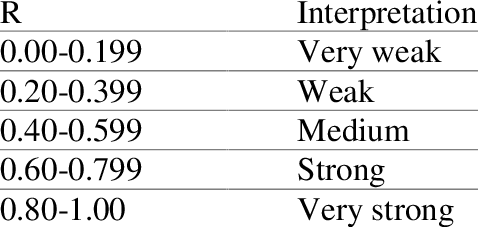

❓ **Question**: Looking at all of our evaluation metrics after cross-validation, what are the strengths and weaknesses of our model?

## Unsupervised Learning Model Evaluation

Model evaluation for unsupervised learning methods is less straightforward than that of supervised learning. We often have no "correct" values to compare our results to, we have to get creative. With cluster analysis, most evaluation methods center around evaluating how cohesive, well-seperated, distinct, dissimilar, or densely packed our clusters are. Popular methods include:

- **Silhouette Score**:
    - Definition: Measures cluster cohesion and separation.
    - Range: From -1 (incorrect clustering) to +1 (highly dense clustering). Scores around zero indicate highly overlapping clusters. A clustering with an average silhouette width of over 0.7 is considered to be "strong", a value over 0.5 "reasonable", and over 0.25 "weak".
    - Minimize/Maximize: Maximize--better clusterings will have higher Silhouette Scores

- **Calinski-Harabasz Index**:
    - Definition: Ratio of between-cluster to within-cluster variance.
    - Range: Starts at 0 (can't be negative) but is not bounded, meaning the index could theoretically reach any positive value.
    - Minimize/Maximize: Maximize--score is higher when clusters are dense and well-seperated.

- **Davies-Bouldin Index**:
  - Definition: Average similarity of clusters. Simpler than the computation of Silhouette scores.
  - Range: Starts at 0 (can't be negative) but is not bounded, meaning the index could theoretically reach any positive value.
  - Minimize/Maximize: Minimize--a lower value means the clustering is better.

- **Inertia**:
  - Definition: Sum of squared distances from each point to nearest cluster center.
  - Range: Starts at 0 (can't be negative) but is not bounded, meaning the index could theoretically reach any positive value.
  - Minimize/Maximize: Minimizes--an effective model has lower inertia. Can be used with the Elbow Method; to determine the optimal number of clusters in K-means, you can plot inertia agains number of clusters and look for the "elbow" point where the decrease in inertia starts to slow down.  

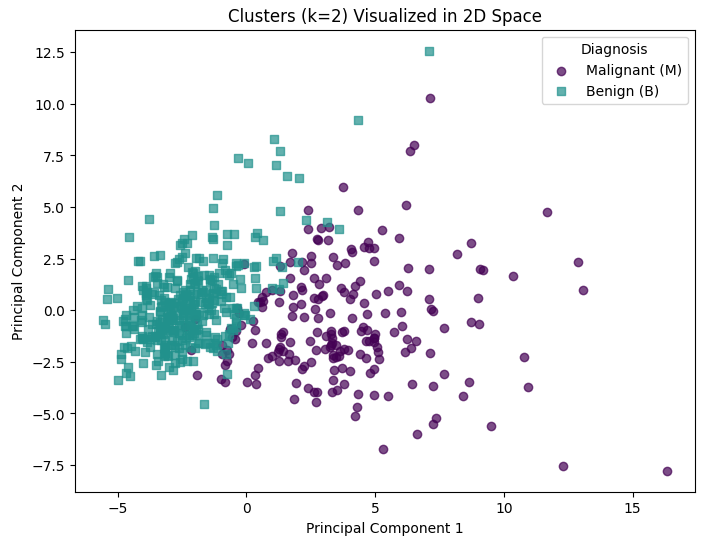

❓ **Question**: Looking at the above picture of our original cluster analysis, which metrics would you expect to be strong? Which would you expect to be weak?

**❕Answer**:
1. Silhouette Score: Somewhat overlapping clusters, but not completely indistinct or incorrect, so I'd expect the Silhouette Score to be in the range of 0.25 to 0.5 -- weak.
2. Calinski-Harabasz Index: Clusters are dense but not well-seperated -- weak.
3. Davies-Bouldin Index: Clusters are fairly distinct -- strong.
4. Inertia: The benign cluster points aren't too far from the center but that of the malignant points are -- weak.

Let's revisit our project on clustering features of tumors with the goal of shedding light on breast cancer diagnoses. Recall that we assigned labels to our clusters to give us a "correct" label to compare it to, but if we didn't have those labels, we'd have to rely solely on the above metrics.  

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load DataFrame
tumor_df = pd.read_csv('ClusterAnalysis-breastcancer.csv')

# Seperate features and target
X = tumor_df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)  # Features shouldn't include target, drop NaN values in unnamed column
y = tumor_df['diagnosis']  # Target

# Scale the Data - k-means is highly sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)  # Use the scaled features

# Get cluster labels
cluster_labels = kmeans.labels_

In [ ]:
tumor_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Now, let's calculate the Silhouette Score, the Calinski-Harabasz Index, the Davies-Bouldin Index, and the Inertia of our clustering.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances

# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette}")

# Calculate Calinski-Harabasz Score
cal_har = calinski_harabasz_score(X_scaled, cluster_labels)
print(f"Calinski-Harabasz Score: {cal_har}")

# Calculate Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
print(f"Davies-Bouldin Score: {davies_bouldin}")

# Calculate Inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Silhouette Score: 0.3447344346611054
Calinski-Harabasz Score: 267.6804357184897
Davies-Bouldin Score: 1.3092887340398867
Inertia: 11595.683312822124


### The Curse of Dimensionality

Our feature DataFrame, *X*, has 30 columns, which in our original project, we flattened using PCA in order to visualize. A low Silhouette Score can often be the result of **the Curse of Dimensionality**, a broad term that encompasses all of the issues encountered when our feature space (the columns we're training on) is high-dimensional (there are a lot of them). As dimensionality increases, the distance to the nearest data point approaches the distance to the farthest data point, driving our Silhouette Score down.

In the case of the Wisconsin Breast Cancer dataset, the features were computed from a digitized image of a breast mass. They describe characteristics of the cell nuclei present in the image such as the mean, standard error, and "worst" value for cell radius, texture, symmetry, etc. Would our model improve or worsen if we omitted some of the features?

**✅ Try it yourself**: Try k-means clustering on a subset of the feature space (i.e., don't use all of the columns) that just includes the "worst" columns:
- `radius_worst`
- `texture_worst`
- `symmetry_worst`
- `concavity_worst`
- `fractal_dimension_worst`

Then, calculate the Silhouette Score, the Calinski-Harabesz Score, the Davies-Bouldin Score, and the Inertia. Which metrics improved?

Note that for the next section, make sure your scaled features column is still called `X_scaled` in order to visualize using PCA.

In [ ]:
# Your Code Here

In [ ]:
# Solution - LW

# Load DataFrame
tumor_df = pd.read_csv('ClusterAnalysis-breastcancer.csv')

# Seperate features and target
X = tumor_df[['radius_worst', 'texture_worst', 'symmetry_worst', 'concavity_worst', 'fractal_dimension_worst']]
y = tumor_df['diagnosis']  # Target

# Scale the Data - k-means is highly sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)  # Use the scaled features

# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette}")

# Calculate Calinski-Harabasz Score
cal_har = calinski_harabasz_score(X_scaled, cluster_labels)
print(f"Calinski-Harabasz Score: {cal_har}")

# Calculate Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
print(f"Davies-Bouldin Score: {davies_bouldin}")

# Calculate Inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Silhouette Score: 0.3748748666030955
Calinski-Harabasz Score: 323.95945987620115
Davies-Bouldin Score: 1.192741078412761
Inertia: 1810.5369241201417


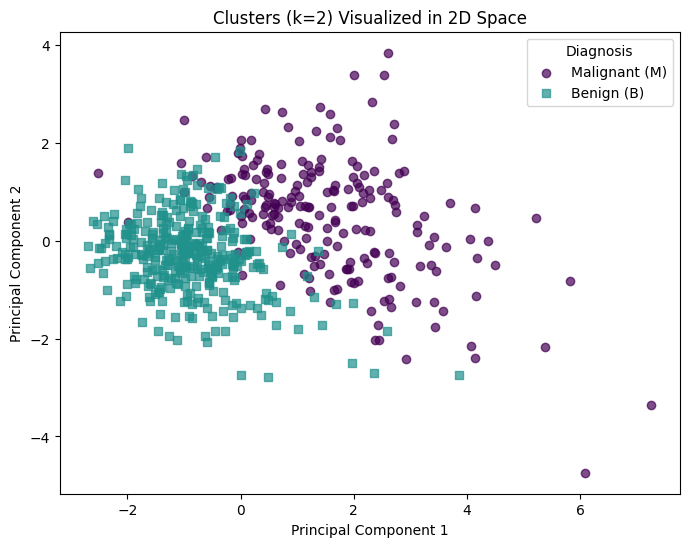

In [ ]:
from sklearn.decomposition import PCA

# Create PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create the plot
plt.figure(figsize=(8, 6))

# Create the scatter plot for each class separately
plt.scatter(X_pca[tumor_df['diagnosis'] == 'M', 0],
           X_pca[tumor_df['diagnosis'] == 'M', 1],
           c='#440154',  # Purple for Malignant
           marker='o',
           label='Malignant (M)',
           alpha=0.7)

plt.scatter(X_pca[tumor_df['diagnosis'] == 'B', 0],
           X_pca[tumor_df['diagnosis'] == 'B', 1],
           c='#21918c',  # Teal for Benign
           marker='s',
           label='Benign (B)',
           alpha=0.7)

plt.title('Clusters (k=2) Visualized in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.legend(title='Diagnosis', loc='best')

plt.show()

## Putting It All Together

It takes practice to effectively pick the most important model evaluation method for each machine learning task. Understanding different evaluation techniques is crucial because they help us assess how well our models will perform in real-world situations, identify potential biases or weaknesses, and ultimately determine if our model will actually solve the problem at hand. The right evaluation metrics can mean the difference between deploying a model that provides genuine value versus one that looks good on paper but fails in practice.

🤺 **Challenge**: Pick any dataset that interests you and build a model of your choice. Select at least two evaluation methods we've covered to assess your model's performance. Write a brief explanation of why you chose those specific evaluation metrics and what they reveal about your model's strengths and weaknesses.

In [ ]:
# Your Code Here

## Conclusion

💡 **Main idea**: Different model evaluation methods are used for different models--whether it be classification, regression, or unsupervised clustering--and the method you choose should depend greatly on the problem at hand.

### 📑 Sources and Further Reading:

1. [Evaluating a Classification Model](https://www.ritchieng.com/machine-learning-evaluate-classification-model/) | Ritchie Ng
2. [k-Fold Cross Validation](https://machinelearningmastery.com/k-fold-cross-validation/) | Jason Brownlee
3. [How to Interpret the Classification Report in sklearn](https://www.statology.org/sklearn-classification-report/) | Zach Bobbitt
4. [Understanding a Classification Report for Your Machine Learning Model](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397) | Shivam Kohli
5. [How to measure clustering performances when there are no ground truth](https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c) | Haitian Wei
6. [When Is Nearest Neighbor Meaningful](https://minds.wisconsin.edu/handle/1793/60174) | Beyer, Goldstein, Ramakrishnan, Shaft
